In [ ]:
from zipfile import ZipFile

zip_ref = ZipFile("/content/drive/MyDrive/dogs-vs-cats.zip")
zip_ref.extractall('/content/drive/MyDrive/dogs-vs-cats')
zip_ref.close()

In [ ]:
def zip_file(file_path):
  zip_ref = ZipFile(file_path)
  zip_ref.extractall(file_path.split('.')[0])
  zip_ref.close()

In [ ]:
zip_file('/content/drive/MyDrive/dogs-vs-cats/train.zip')

In [ ]:
zip_file('/content/drive/MyDrive/dogs-vs-cats/test1.zip')

In [ ]:
def delete_file(file_name):
  if os.path.exists(file_name):
    os.remove(file_name)
    print('File Removed')
  else:
    print('File Not Found')

In [ ]:
import os
delete_file('/content/drive/MyDrive/dogs-vs-cats.zip')

File Removed


In [ ]:
delete_file('/content/drive/MyDrive/dogs-vs-cats/test1.zip')
delete_file('/content/drive/MyDrive/dogs-vs-cats/train.zip')

File Removed
File Removed


In [3]:
import pandas as pd
sample = pd.read_csv('/content/drive/MyDrive/dogs-vs-cats/sampleSubmission.csv')
sample.head()

id  label
0   1      0
1   2      0
2   3      0
3   4      0
4   5      0

In [ ]:
len(sample)

12500

In [ ]:
import os

for path, dirs, files in os.walk('/content/drive/MyDrive/dogs-vs-cats'):
  print(f'There is {len(files)} files, and {len(dirs)} directories in the {path}')

There is 1 files, and 3 directories in the /content/drive/MyDrive/dogs-vs-cats
There is 0 files, and 1 directories in the /content/drive/MyDrive/dogs-vs-cats/train


In [ ]:
file_names = os.listdir('/content/drive/MyDrive/dogs-vs-cats/train/train')
file_names[-10:]

['cat.10838.jpg',
 'cat.10839.jpg',
 'cat.1084.jpg',
 'cat.10840.jpg',
 'cat.10841.jpg',
 'cat.10842.jpg',
 'cat.10843.jpg',
 'cat.10844.jpg',
 'cat.10845.jpg',
 'cat.10846.jpg']

In [ ]:
file_names[:10]

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg']

# Importing the dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import os

In [ ]:
for path, dirs, files in os.walk('/content/drive/MyDrive/dogs-vs-cats/train/train'):
  print(f'There is {len(files)} files, and {len(dirs)} directories in the {path}')

There is 24944 files, and 0 directories in the /content/drive/MyDrive/dogs-vs-cats/train/train


# Displaying some images

In [ ]:
def show_image(image_path):
  img = mpimg.imread(image_path)
  plt.imshow(img)
  plt.axis(False);

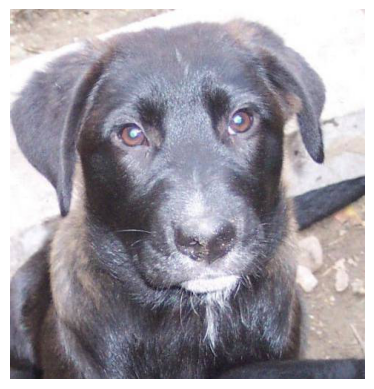

In [ ]:
show_image('/content/drive/MyDrive/dogs-vs-cats/train/train/dog.9990.jpg')

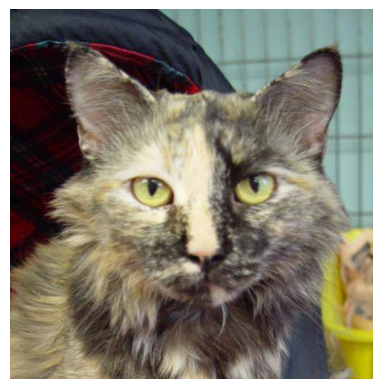

In [ ]:
show_image('/content/drive/MyDrive/dogs-vs-cats/train/train/cat.10.jpg')

# copying the files to another files and make the deep learning structure

In [ ]:
import shutil
os.makedirs('/content/drive/MyDrive/dogs-vs-cats/train1', exist_ok=True)

for image_file in file_names:
  name = image_file[0:3]

  if name == 'dog':
    os.makedirs('/content/drive/MyDrive/dogs-vs-cats/train1/dog', exist_ok=True)
    if os.path.exists(f'/content/drive/MyDrive/dogs-vs-cats/train/train/{image_file}'):
      shutil.copyfile(f'/content/drive/MyDrive/dogs-vs-cats/train/train/{image_file}', f'/content/drive/MyDrive/dogs-vs-cats/train1/dog/{image_file}')
  else:
    os.makedirs('/content/drive/MyDrive/dogs-vs-cats/train1/cat', exist_ok=True)
    if os.path.exists(f'/content/drive/MyDrive/dogs-vs-cats/train/train/{image_file}'):
      shutil.copyfile(f'/content/drive/MyDrive/dogs-vs-cats/train/train/{image_file}', f'/content/drive/MyDrive/dogs-vs-cats/train1/cat/{image_file}')

In [ ]:
def show_directory_files(dir_path):
  for path, dirs, files in os.walk(dir_path):
    print(f'There is {len(files)} files, and {len(dirs)} directories in the {path}')

In [ ]:
show_directory_files('/content/drive/MyDrive/dogs-vs-cats/train1')

There is 0 files, and 2 directories in the /content/drive/MyDrive/dogs-vs-cats/train1
There is 12486 files, and 0 directories in the /content/drive/MyDrive/dogs-vs-cats/train1/cat
There is 12458 files, and 0 directories in the /content/drive/MyDrive/dogs-vs-cats/train1/dog


# Preprocessing the image

In [33]:
import tensorflow as tf

IMG_SIZE=224

def preprocess_image(image, label):
  img = tf.cast(image, tf.float32)  # Convert image to float32
  img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
  return img, label

In [34]:
dir_path = '/content/drive/MyDrive/dogs-vs-cats/train1'

dataset = tf.keras.preprocessing.image_dataset_from_directory(dir_path,
                                      label_mode='binary',
                                      batch_size=32,
                                      image_size=(IMG_SIZE, IMG_SIZE),
                                      shuffle=True,
                                      )

class_names = dataset.class_names
class_names

Found 25039 files belonging to 2 classes.


['cat', 'dog']

In [ ]:
one_sample = next(dataset.as_numpy_iterator())
one_sample

(array([[[[ 70.158485 ,  69.158485 ,  65.158485 ],
          [ 72.2133   ,  71.2133   ,  67.2133   ],
          [ 66.93987  ,  62.877094 ,  61.90848  ],
          ...,
          [122.11873  , 113.11873  , 117.95802  ],
          [117.828125 , 111.97992  , 111.524536 ],
          [116.05356  , 111.05356  , 108.05356  ]],
 
         [[ 67.257675 ,  69.27804  ,  62.767857 ],
          [ 70.716515 ,  71.716515 ,  65.716515 ],
          [ 65.72907  ,  66.252235 ,  60.729076 ],
          ...,
          [124.73132  , 115.73132  , 120.57062  ],
          [124.504456 , 120.21288  , 119.055084 ],
          [122.27231  , 118.27231  , 115.27231  ]],
 
         [[ 64.67411  ,  70.76786  ,  60.72098  ],
          [ 65.64955  ,  71.7433   ,  61.69643  ],
          [ 59.003765 ,  62.14439  ,  53.003765 ],
          ...,
          [129.11006  , 123.20381  , 125.15694  ],
          [126.88796  , 122.90931  , 121.61284  ],
          [124.56918  , 120.70981  , 117.75668  ]],
 
         ...,
 
         [[1

In [35]:
def show_images(set=dataset, skip_num=0, take_num=1):
  plt.figure(figsize=(15, 10))
  for image, label in set.skip(skip_num).take(take_num):
    for i in range(12):
      plt.subplot(3, 4, i+1)
      plt.imshow(image[i].numpy().astype('uint8'))
      plt.title(class_names[int(label[i])])
      plt.axis(False)
  

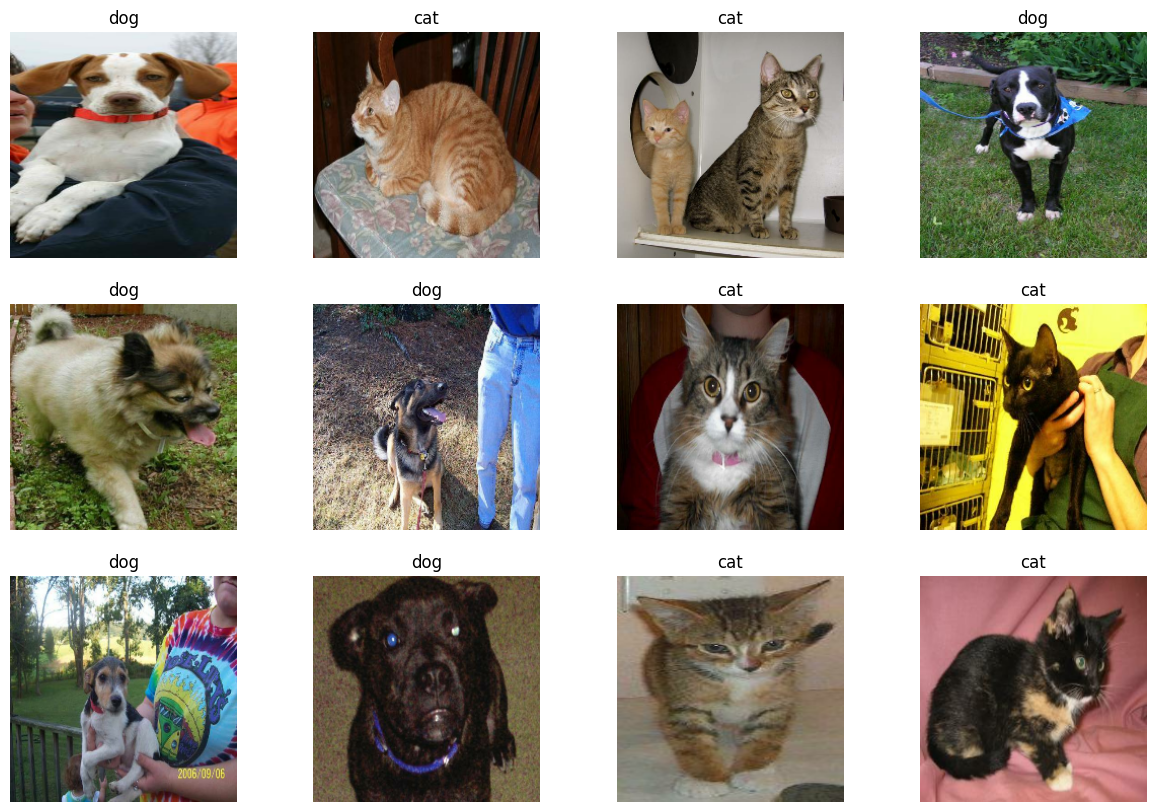

In [ ]:
show_images()

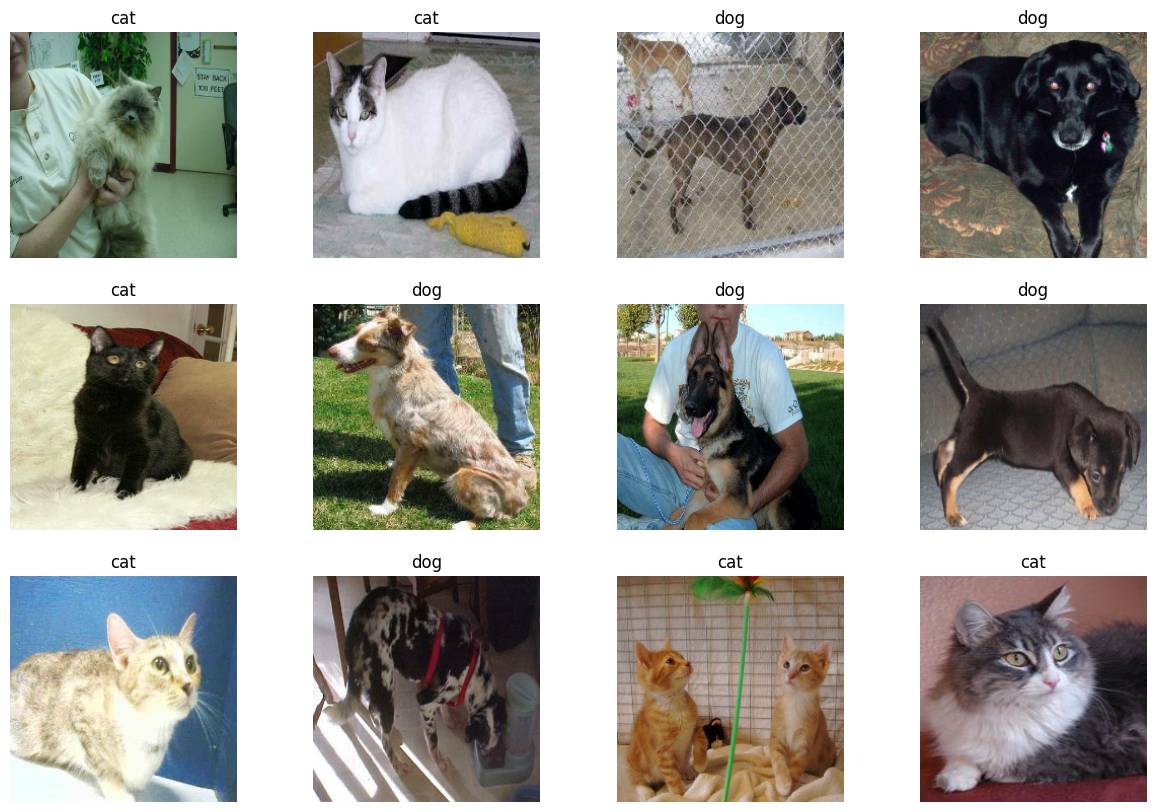

In [ ]:
show_images(skip_num=4)

In [ ]:
len(dataset)

780

# Split the data into train and validation

In [36]:
train_size = 0.8
dataset_length = len(dataset)
train_size_calc = int(train_size * dataset_length)
dataset_train = dataset.take(train_size_calc)
dataset_val = dataset.skip(train_size_calc)

In [37]:
len(dataset_train), len(dataset_val)

(626, 157)

In [38]:
dataset_train = dataset_train.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
dataset_val = dataset_val.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [39]:
len(dataset_val)

157

# Using Transfer Learning with EfficientNetB0

In [40]:
def create_early_stopping(monitor='val_accuracy'):
  return tf.keras.callbacks.EarlyStopping(monitor=monitor, patience=3)

In [41]:
len(os.listdir('/content/drive/MyDrive/dogs-vs-cats/train1/dog'))

12553

In [42]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.training = False

inputs = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3), name='input_layer')

x = base_model(inputs, training=False)

x= tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

history = model.fit(dataset_train, 
                    epochs=100,
                    steps_per_epoch=len(dataset_train),
                    validation_data=dataset_val,
                    validation_steps=len(dataset_val),
                    callbacks=[create_early_stopping()],)

16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/100
626/626 [==============================] - 1800s 2s/step - loss: 0.0428 - accuracy: 0.9869 - val_loss: 0.0240 - val_accuracy: 0.9924
Epoch 2/100
626/626 [==============================] - 242s 386ms/step - loss: 0.0185 - accuracy: 0.9945 - val_loss: 0.0246 - val_accuracy: 0.9924
Epoch 3/100
626/626 [==============================] - 224s 356ms/step - loss: 0.0114 - accuracy: 0.9965 - val_loss: 0.0247 - val_accuracy: 0.9924
Epoch 4/100
626/626 [==============================] - 222s 353ms/step - loss: 0.0074 - accuracy: 0.9980 - val_loss: 0.0249 - val_accuracy: 0.9926
Epoch 5/100
626/626 [==============================] - 221s 352ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.0273 - val_accuracy: 0.9926
Epoch 6/100
626/626 [==============================] - 242s 386ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0283 - val_accuracy: 0.9932
Epoch 7/100
626/626 [==============================] - 

<Axes: >

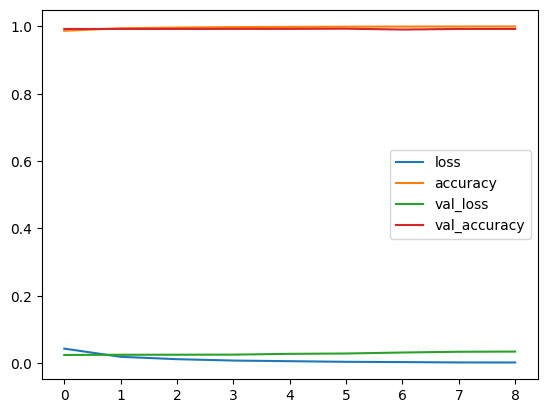

In [43]:
pd.DataFrame(history.history).plot()

In [ ]:
tf.saved_model.save(model, '/content/drive/MyDrive/dogs-vs-cats/saved_model')

In [61]:
import os
import random

def test_images(directory='/content/drive/MyDrive/dogs-vs-cats/test1/test1', num_samples=25):
  file_names = os.listdir(directory)
  random_samples = random.sample(file_names, num_samples)
  plt.figure(figsize=(10, 7))
  for i, file_name in enumerate( random_samples):
    file_path = os.path.join(directory, file_name)
    plt.subplot(5, 5, i+1)

    img = mpimg.imread(file_path)
    plt.imshow(img)
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = tf.expand_dims(img, axis=0)
    prediction = model.predict(img)

    if prediction[0] <= 0.5:
      label = "cat"
    else:
      label = "dog"
      
    plt.title(label)
    plt.axis(False);

1/1 [==============================] - 0s 30ms/step


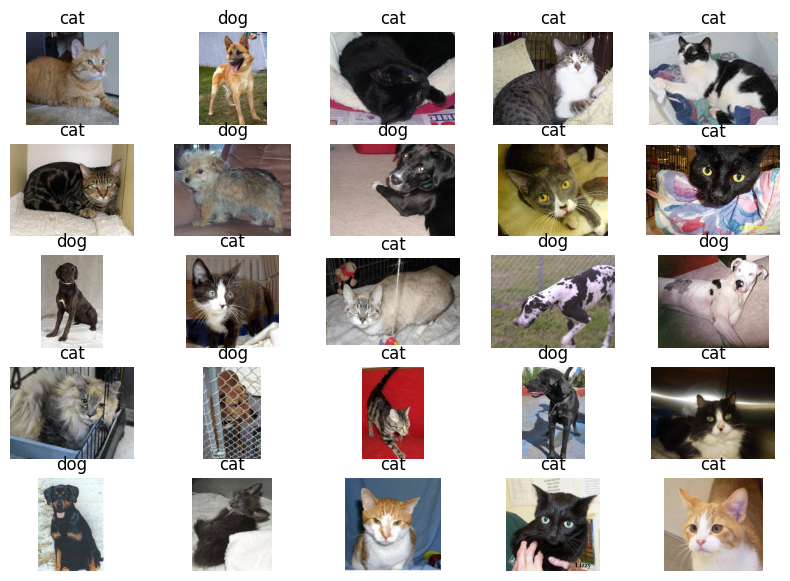

In [62]:
test_images()

1/1 [==============================] - 0s 47ms/step


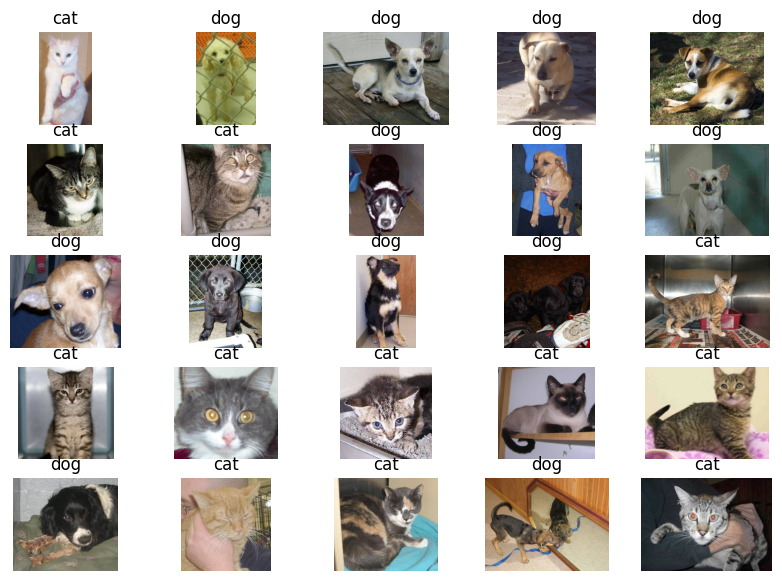

In [63]:
test_images()

1/1 [==============================] - 0s 25ms/step


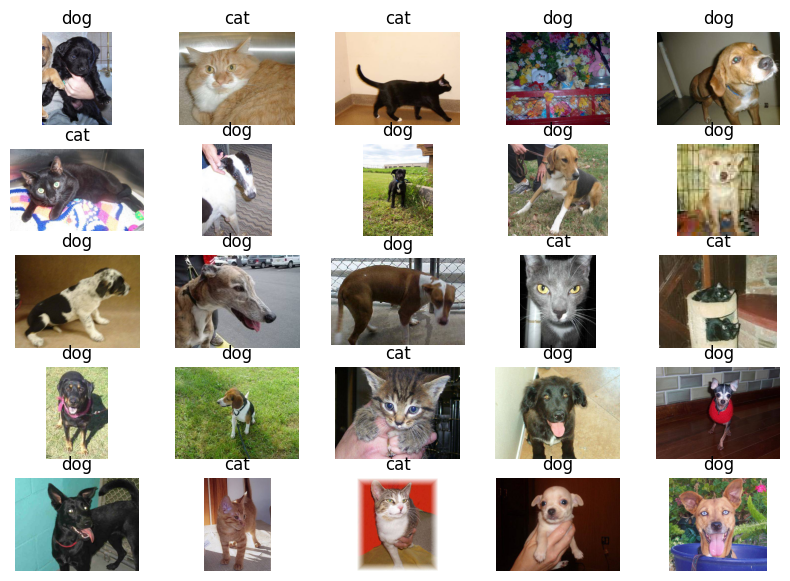

In [64]:
test_images()